# This document provides a concise, non‑technical description of how the Fin$mart Chat proof‑of‑concept was assembled. The intention is to give business stakeholders a clear understanding of what was built, why we chose this approach, and the minimal steps required to replicate the result. 

# 1.Purpose

Financial literacy remains a significant barrier to economic participation, especially in underserved communities. People struggle to find credible, simple and easy to understand answers on budgeting, saving, credit, and investing. Existing resources are scattered, jargon‑heavy, or assume prior knowledge. Traditional tools also lack interactivity and personalisation. Fin$mart Chat addresses these problems by delivering plain‑language answers to common finance related questions without relying on external APIs or proprietary data services.

# 2.Solution Overview 

We build a lightweight RAG pipeline:

Data ➜ embeddings ➜ Chroma: convert a curated FAQ CSV into vector embeddings using Ollama Embeddings

Retriever → LLM: grab the most relevant chunks and feed them, with a chat prompt template, into Llama 3 1‑B‑Instruct running locally via Ollama.

Domain filter: a second quick LLM call checks if the answer is finance‑related. If not, we politely refuse. Otherwise we just ChatGPT:)

Streamlit UI: front‑end chat interface.

User Browser  →  Streamlit Web App  →  Retrieval Module  →  Local LLM  →  Response
![Screenshot 2025-05-09 at 15.57.15.png](<attachment:Screenshot 2025-05-09 at 15.57.15.png>)


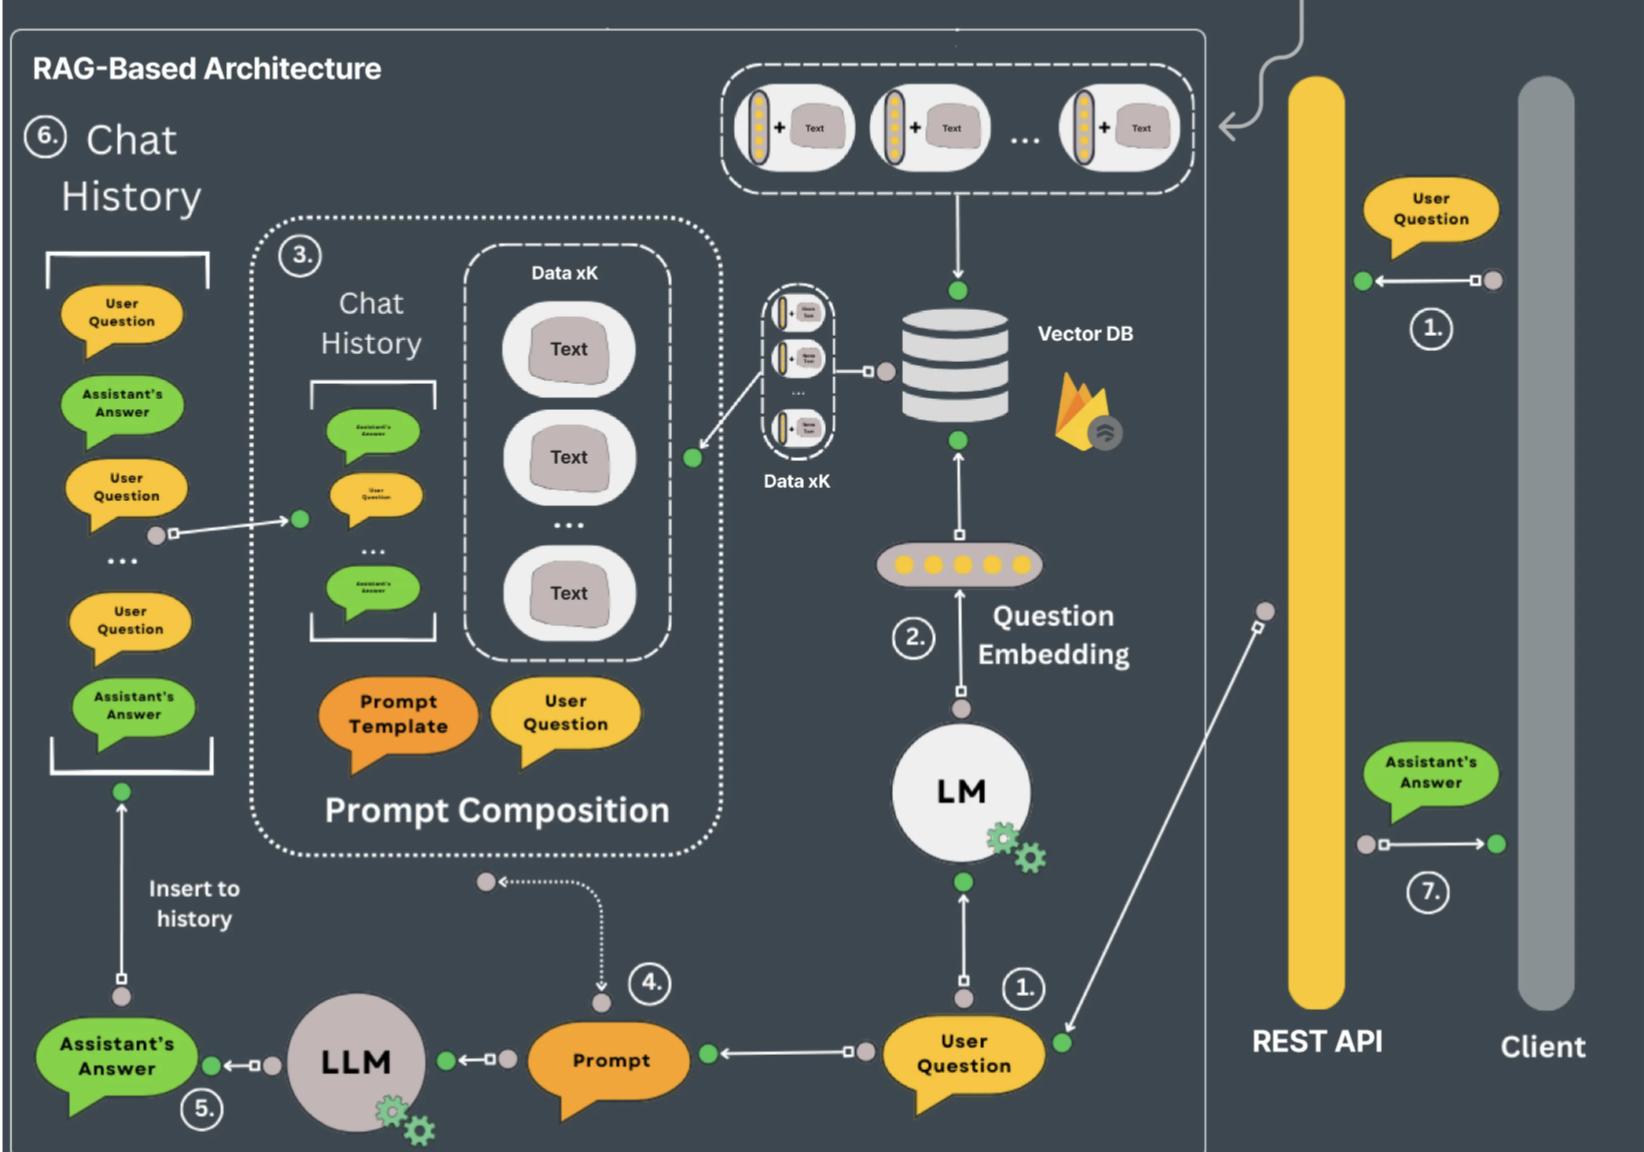

# 3.Functional Workflow

Data ingestion – a curated CSV containing finance Q&A pairs is loaded into memory.

Chunking & indexing – each answer is divided into 512‑token segments and embedded; embeddings are stored in Chroma for similarity search.

Query handling – when a user submits a question, the retrieval module returns the top three matching segments.

Answer generation – the LLM reviews these segments and drafts a response.

Domain validation – an additional prompt confirms that the response remains within the financial domain; non‑compliant answers are rejected.

# 4. Minimal Setup

-Install Ollama and pull model llama3.2:1b-instruct-q8_0

-Install Python packages: streamlit, langchain, chromadb, pandas

-Place the Q&A CSV in data/train_data.csv

-Execute streamlit run finsmart_chat.py
